# MRIO Workshop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.4 & 2 Load and clean data

### WIOT Data

In [2]:
lookup = pd.read_excel('Data/WIOT/wiot95_row_apr12.xlsx', index_col=None, header=None).iloc[6:,:4].set_index(1)
lookup[2].fillna('TOT', inplace=True)
lookup.columns = ['sector_code', 'country', 'sector']

In [3]:
lookup.head()

,sector_code,country,sector
1,,,
"Agriculture, Hunting, Forestry and Fishing",AtB,AUS,c1
Mining and Quarrying,C,AUS,c2
"Food, Beverages and Tobacco",15t16,AUS,c3
Textiles and Textile Products,17t18,AUS,c4
"Leather, Leather and Footwear",19,AUS,c5


In [4]:
# function for WIOT Data

def import_wiot(year):
    file_loc = 'Data/WIOT/wiot' + str(year)[2:] + '_row_apr12.xlsx'
    
    # import data
    df = pd.read_excel(file_loc, index_col=None, header=None).iloc[4:,2:]
    df[1644].fillna('Total', inplace=True)
    df[2].fillna('TOT', inplace=True)

    #set columns
    c1 = df.iloc[0].tolist()
    c1[0] = 'country'
    c2 = df.iloc[1].tolist()
    c2[1] = 'sector'
    df.columns = [c1, c2]

    # set index
    df = df.drop([4, 5], axis=0).set_index([('country', 'TOT'), (np.nan, 'sector')]).fillna(0)
    
    return(df)

In [5]:
year_list = []
for i in range(1995, 2010):
    year = i
    year_list.append(year)

In [6]:
wiot_list = []
for i in year_list:
    df = import_wiot(i)
    wiot_list.append(df)

In [19]:
# Z, V and Y matrices
z_list_a = []
v_list_a = []
y_list_a = []

Z_df = []
V_df = []
Y_df = []

col_list = []
for i in range(1, 36):
    c = 'c' + str(i)
    col_list.append(c)
    
for i in range(len(wiot_list)):
    z=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    z_list_a.append(np.array(z))
    Z_df.append(z)
    
    v=wiot_list[i].swaplevel(axis=0).loc[['r99', 'r60', 'r61', 'r62', 'r64', 'r69']].swaplevel(axis=1).loc[:, col_list].swaplevel(axis=1)
    v_list_a.append(np.array(v))
    V_df.append(v)
    
    y=wiot_list[i].drop('TOT', axis=0).swaplevel(axis=1)[['c37', 'c38', 'c39', 'c41', 'c42']]
    y_list_a.append(np.array(y))
    Y_df.append(y)

c:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [20]:
# Change into matrices and save as Z, V, Y

Z_a = np.array(z_list_a)
V_a = np.array(v_list_a)
Y_a = np.array(y_list_a)

In [21]:
print(type(Z_a), type(V_a), type(Y_a))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
print(Z_a.shape, V_a.shape, Y_a.shape)

(15, 1435, 1435) (15, 6, 1435) (15, 1435, 205)


## 3. Load the extension data

In [23]:
# country list 

country_list = ['AUS','AUT','BEL','BGR','BRA','CAN','CHN','CYP','CZE','DEU','DNK','ESP','EST','FIN','FRA','GBR','GRC','HUN','IDN','IND','IRL','ITA','JPN','KOR','LTU','LUX','LVA','MEX','MLT',
                'NLD','POL','PRT','ROU','RUS','SVK','SVN','SWE','TUR','TWN','USA','ROW']

country = np.array(country_list)

l1 = lookup[['sector']].drop_duplicates()
l1 = l1.loc[l1.sector.str[0] == 'c']

### Energy

F_NRG

In [24]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_energy(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
    df.index = df.index.droplevel(level=1)
    df = df.join(l1, how='right')
    df['energy'] = df['TOTAL']
    df['country'] = str(country)
    df = df[['country', 'sector', 'energy']].fillna(0)
       
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
        # import data
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
        temp.index = temp.index.droplevel(level=1)
        temp = temp.join(l1, how='right')
        temp['energy'] = temp['TOTAL']
        temp['country'] = str(country)
        temp = temp[['country', 'sector', 'energy']].fillna(0)
        
        df = df.append(temp)
    
    df=df.set_index(['country', 'sector']).T      
    return(df)

In [25]:
array_list = []
df_list = []

for year in range(1995, 2010):
    df_energy = import_energy(year, country_list)
    array_list.append(np.array(df_energy))
    df_list.append(df_energy)
    
F_NRG_a = np.array(array_list)
F_NRG_df = df_list

In [26]:
F_NRG_a.shape

(15, 1, 1435)

F_NRG_hh

In [27]:
def import_energy_hh(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1]
    df[str(country)] = df['TOTAL']
    df = df[[str(country)]].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-EU/' + str(country) + '_EU_May12.xls'
        # import data
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1]
        temp[str(country)] = temp['TOTAL']
        temp = temp[[str(country)]].fillna(0)
        df = df.join(temp)
        
    return(df)

In [28]:
array_list = []
df_list = []

for year in range(1995, 2010):
    df_energy_hh = import_energy_hh(year, country_list)
    array_list.append(np.array(df_energy_hh))
    df_list.append(df_energy_hh)
    
F_NRG_hh_a = np.array(array_list)
F_NRG_hh_df = df_list

In [29]:
F_NRG_hh_a.shape

(15, 1, 41)

### Air Quality

F_GHG

In [30]:
# function for Energy Data --> make array of vecotrs containing total energy use per year per sector

def import_air(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
    df.index = df.index.droplevel(level=1)
    df = df.join(l1, how='right')
    df = df[['CO2', 'CH4', 'N2O', 'sector']]
    df['CH4'] = (df['CH4'] / 1000) * 28
    df['N2O'] = (df['N2O'] / 1000) * 265
    df['CO2e'] = df['CO2'] + df['CH4'] + df['N2O']
    df['country'] = str(country)
    df = df[['CO2e', 'country', 'sector']].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
        # import data (only from 35 sectors, remove totals)
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0)
        temp.index = temp.index.droplevel(level=1)
        temp = temp.join(l1, how='right')
        temp = temp[['CO2', 'CH4', 'N2O', 'sector']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        temp['CH4'] = (temp['CH4'] / 1000) * 28
        temp['N2O'] = (temp['N2O'] / 1000) * 265
        temp['CO2e'] = temp['CO2'] + temp['CH4'] + temp['N2O']
        temp['country'] = str(country)
        temp = temp[['CO2e', 'country', 'sector']].fillna(0)
    
        df = df.append(temp)
        
    df = df.set_index(['country', 'sector']).T
    return(df)

In [31]:
array_list = []
df_list = []

for year in range(1995, 2010):
    df_air = import_air(year, country_list)
    array_list.append(np.array(df_air))
    df_list.append(df_air)
    
F_GHG_a = np.array(array_list)
F_GHG_df = df_list

In [32]:
F_GHG_df[1]

country            AUS                                                    \
sector              c1            c2           c3          c4         c5   
CO2e     111142.074922  44305.816396  3631.093252  640.497279  51.445794   

country                                                                ...   \
sector           c6           c7            c8           c9        c10 ...    
CO2e     359.355615  2116.769447  10967.292899  6588.388059  84.731161 ...    

country           ROW                                                          \
sector            c26           c27           c28           c29           c30   
CO2e     25810.080297  17767.325026  16051.804481  10681.074909  43279.861269   

country                                                                
sector             c31          c32           c33            c34  c35  
CO2e     115062.799028  19791.94622  38123.345675  347627.906601  0.0  

[1 rows x 1435 columns]

In [33]:
F_GHG_a.shape

(15, 1, 1435)

F_GHG_hh

In [34]:
def import_air_hh(year, country_list):
    array_list = []
    df_list = []
    sheet = str(year)
    
    country = country_list[0]
    file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
    # import data
    df = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
    df = df[['CO2', 'CH4', 'N2O']]
    df['CH4'] = (df['CH4'] / 1000) * 28
    df['N2O'] = (df['N2O'] / 1000) * 265
    df[str(country)] = df['CO2'] + df['CH4'] + df['N2O']
    df = df[[str(country)]].fillna(0)
    
    for i in range(1, len(country_list)):
        country = country_list[i]
        file_loc = 'Data/EAS-AIR/' + str(country) + '_AIR_May12.xls'
        # import data (only from 35 sectors, remove totals)
        temp = pd.read_excel(file_loc, sheet_name=sheet, index_col=None).drop([(np.nan, np.nan)], axis=0).iloc[-2:-1] # select only household category
        temp = temp[['CO2', 'CH4', 'N2O']]
        # convert to kilotonnes and then construct CO2e (using 100 year GWP, AR5; https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)
        temp['CH4'] = (temp['CH4'] / 1000) * 28
        temp['N2O'] = (temp['N2O'] / 1000) * 265
        temp[str(country)] = temp['CO2'] + temp['CH4'] + temp['N2O']
        temp = temp[[str(country)]].fillna(0)
        df = df.join(temp)
        
    return(df)

In [35]:
array_list = []
df_list = []

for year in range(1995, 2010):
    df_air_hh = import_air_hh(year, country_list)
    array_list.append(np.array(df_air_hh))
    df_list.append(df_air_hh)
    
F_GHG_hh_a = np.array(array_list)
F_GHG_hh_df = df_list

In [36]:
F_GHG_hh_a.shape

(15, 1, 41)

In [37]:
F_GHG_hh_df[1]

,,AUS,AUT,BEL,BGR,BRA,CAN,CHN,CYP,CZE,DEU,...,PRT,ROU,RUS,SVK,SVN,SWE,TUR,TWN,USA,ROW
Final consumption expenditure by households,FC_HH,37823.2669,19829.94475,35943.56316,5901.82963,61701.523409,77485.198142,468089.523516,1086.71842,12946.65942,242522.30175,...,9566.63,13390.36018,195776.29195,4878.95473,5138.76546,16874.76854,44680.246665,17084.272369,667880.216056,614738.576214


# 4. Save matrices as files

In [38]:
mat_list = ['Z_a', 'V_a','Y_a', 'F_NRG_a', 'F_NRG_hh_a', 'F_GHG_a', 'F_GHG_hh_a', 'country']

for mat in mat_list:
    np.save('Data/Matrices/' + str(mat) + '_mat.npy', eval(mat))

# 5. Calculating energy and emissions consumption-based accounts

For reference, use:  
http://www.see.leeds.ac.uk/teaching-resources/exercise-pages/l4-input-output-tutorial-201617/  
http://mathesaurus.sourceforge.net/matlab-numpy.html 

### 5.1. The UK's production and conumption based GHG emissions from 1995-2009

UK Production

In [39]:
# fnd index position for UK
UK = country_list.index('GBR')

In [40]:
# using arrays & df

UK_production_a = []
prod_year_a = []

for i in range(len(F_GHG_hh_a)):
    ghg = F_GHG_hh_a[i][0][UK] + F_GHG_df[i][['GBR']].sum(axis=1)
    UK_production_a.append(ghg)

In [41]:
# array

CO2e_list = []

for i in range(len(UK_production_a)):
    ghg = UK_production_a[i][0]
    CO2e_list.append(ghg)

UK_production_df = pd.DataFrame({'Year':range(1995,2010), 'Production':CO2e_list})

(0, 1200000)

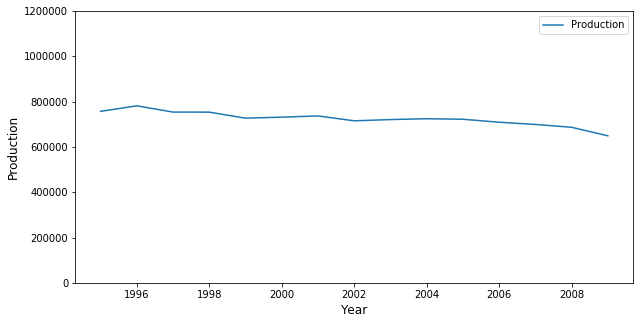

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

UK_production_df.plot(ax=ax, x='Year', y='Production')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Production', fontsize=12)

ax.set_ylim([0,1200000])

UK Consumption

In [84]:
# calculate x for each year (column sum of Z plus V)

x_list = []
for i in range(len(Z_a)):
    x_temp = Z_a[i].sum(axis=0) + V_a[i].sum(axis=0)
    x_list.append(x_temp)
x1 = np.array(x_list)#.reshape(15, 1435, 1)

In [85]:
x1[-1]

array([108636.42060373, 363934.59419965, 174907.87520497, ...,
       976780.96183253, 985004.74477264,  11384.85644956])

In [91]:
# calculate x for each year (row sum of Z plus Y)

x_list = []
x_list2 = []
for i in range(len(Z_a)):
    x_temp = Z_a[i].sum(axis=1) + Y_a[i].sum(axis=1)
    for j in range(len(x_temp)):
        if x_temp[j]==0:
            x_temp[j]=0.000000001 # do this to avoid trying to divide my zero later
        else:
            pass
    x_list.append(x_temp.reshape(1435,1))
    x_list2.append(x_temp)
x = np.array(x_list) # this is vertical
x2 = np.array(x_list2) # this is needed to get diagonal matirx later

In [92]:
x.shape

(15, 1435, 1)

In [94]:
UK_consumption = []
for i in range(len(year_list)):
    x = np.array(Z_a[i].sum(axis=1) + Y_a[i].sum(axis=1))
    if x == 0:
        x = 0.000000001
    else:
        pass
    x_t = np.linalg.inv(x)
    big_x = x.repeat(len(x), axis=1)
    A = Z_a[i].divide(np.linalg.inv(big_x))
    I = np.identity(Z_a.shape[1])
    L = np.linalg.inv(A - I)
    F_GHGx = F_GHG_a[i].divide(x_t)
    Y_UK = 

15

In [79]:
# calculate A by dot dividing Z by big_x, element-wise division in python is done by using '/', floor division by using '//'

big_x = []
for i in range(len(x)):
    new_x = x[i].repeat(len(x[i]), axis=1)
    big_x.append(new_x)

big_x_a = np.array(big_x)

# this is not needed, already in the right format
'''
big_x = []
for i in range(len(big_x_a)):
    new_x = big_x_a[i].transpose()
    big_x.append(new_x)
    
big_x_a2 = np.array(big_x)
'''

A_a = Z_a/big_x_a

In [80]:
# check that all are below 1

print('Min: ' + str(A_a.min()), '\t', 'Max: ' + str(A_a.max()))

Min: -36783594329564.734 	 Max: 1270354963203233.2


In [60]:
# Get the Leontief inverse

# get I
I = np.identity(Z_a.shape[1])

# Lenotief inverse for all years
L_list = []
for i in range(len(A_a)):
    L = np.linalg.inv(I-A_a[i])
    L_list.append(L)
L_a = np.array(L_list)

In [61]:
# create diagonal matrix
x_diag = []
for i in range(len(x2)):
    x_new = np.diag(x2[i])
    x_diag.append(x_new)
x_diag = np.array(x_diag)

In [62]:
x_diag.shape

(15, 1435, 1435)

In [63]:
# calculate inverset of x_diag
x_diag_inv = []
for i in range(len(x_diag)):
    x_new = np.linalg.inv(x_diag[i])
    x_diag_inv.append(x_new)
x_diag_inv = np.array(x_diag_inv)

In [64]:
# calculate emissions intensity factor e = f * inv(x)
# e is the 'direct impact multiplier'. It tells you how many tonnes of GHGs are emitted per $ of output in each of the industries in our world.

e = []
for i in range(len(F_GHG_a)): # uise this as the other one has 2 years less, though they both start at 1995
    e_new = F_GHG_a[i].dot(x_diag_inv[i])
    e_new = e_new.sum(axis=0)
    e.append(e_new)
e = np.array(e)

In [65]:
e.shape

(15, 1435)

In [66]:
Y_UK = []
for i in range(len(Y_a)):
    Y_temp = []
    for j in range(len(Y_a[i])):
        y = np.array(Y_a[i][j][UK])
        Y_temp.append(y)
    Y_UK.append(np.array(Y_temp))
Y_UK = np.array(Y_UK)

In [67]:
Y_UK.shape

(15, 1435)

In [68]:
L_a.shape

(15, 1435, 1435)

In [69]:
# Q=eLy; total emissions can be calculated by multiplying emissions intensity by the Leontief inverse and final demand
# to find emissions of specific countries use the Y and from a specific country

Q_UK = []
for i in range(len(e)): # choose e, because it is shorter (1995-2009)
    Q = e[i].dot(L_a[i]).dot(Y_UK[i])
    Q_UK.append(Q)

In [70]:
Q_UK

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [71]:
UK_production_df['Consumption'] = Q_UK

(0, 1200000)

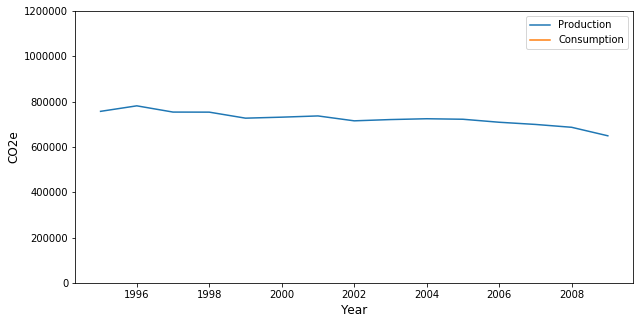

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))

UK_production_df.plot(ax=ax, x='Year', y='Production')
UK_production_df.plot(ax=ax, x='Year', y='Consumption')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2e', fontsize=12)

ax.set_ylim([0,1200000])

In [ ]:
UK_production_df

(0, 1200000)

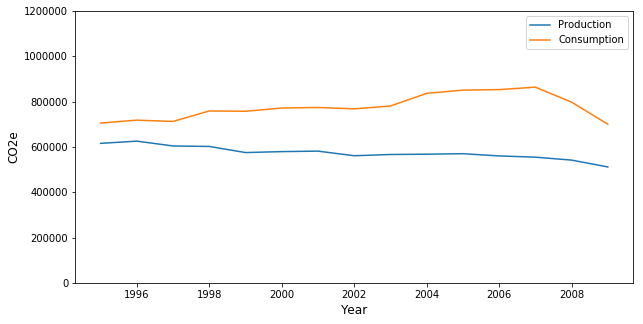

In [121]:
check = pd.read_csv('Data/final_test.csv')

fig, ax = plt.subplots(figsize=(10, 5))

check.plot(ax=ax, x='Year', y='Production')
check.plot(ax=ax, x='Year', y='Consumption')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('CO2e', fontsize=12)

ax.set_ylim([0,1200000])